In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import zipfile
with zipfile.ZipFile('../input/plates.zip', 'r') as zip_obj:
   # Extract all the contents of zip file in current directory
   zip_obj.extractall('/kaggle/working/') 
print('After zip extraction:')
print(os.listdir("/kaggle/working/"))

['sample_submission.csv', 'plates.zip']
After zip extraction:
['plates', 'train', 'val', '__MACOSX']


In [7]:
data_root = '/kaggle/working/plates/'
print(os.listdir(data_root))

['train', 'test', '.DS_Store']


In [8]:
import shutil 
from tqdm import tqdm

train_dir = 'train'
val_dir = 'val'

class_names = ['cleaned', 'dirty']

for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 6 != 0:
            dest_dir = os.path.join(train_dir, class_name) 
        else:
            dest_dir = os.path.join(val_dir, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

100%|██████████| 21/21 [00:00<00:00, 4736.52it/s]


In [1]:
!ls train

ls: cannot access 'train': No such file or directory


In [2]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time
import copy
from torchvision import transforms, models
train_transforms = [
    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),
    
    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ColorJitter(brightness=0.6, contrast=0.6, saturation=0.3, hue=0.3),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),
        
    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.RandomOrder([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
        ]),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),
    
     transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),
        
    transforms.Compose([
    transforms.RandomRotation(45),
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),
        
    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.RandomGrayscale(p=1),
    transforms.RandomOrder([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
        ]),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),
    
     transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ColorJitter(brightness=0.2, contrast=0.4, saturation=0.4, hue=0.4),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
]

val_transforms = transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = torch.utils.data.ConcatDataset([torchvision.datasets.ImageFolder(train_dir,train_transform)
                                                    for train_transform in train_transforms])

val_dataset = torch.utils.data.ConcatDataset([torchvision.datasets.ImageFolder(val_dir,train_transform)
                                                    for train_transform in train_transforms])

batch_size = 16
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size)


NameError: name 'train_dir' is not defined

In [ ]:
# from torchvision import transforms, models
# # train_transforms = transforms.Compose([
# #     transforms.RandomResizedCrop(224),
# #     transforms.RandomHorizontalFlip(),
# #     transforms.ToTensor(),
# #     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# # ])
# # train_transforms = transforms.Compose([
# #     transforms.RandomResizedCrop(224),
# #     transforms.RandomHorizontalFlip(),
# #     transforms.RandomVerticalFlip(),
# #     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
# #     transforms.RandomRotation(10),
# #     transforms.ToTensor(),
# #     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# # ])
# train_transforms = transforms.Compose([
#     transforms.RandomResizedCrop(224),
#     transforms.RandomHorizontalFlip(),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
#     transforms.RandomRotation(15),
#     transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])

# val_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])

# train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
# val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

# batch_size = 16
# train_dataloader = torch.utils.data.DataLoader(
#     train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size)
# val_dataloader = torch.utils.data.DataLoader(
#     val_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size)

In [ ]:
len(train_dataloader), len(train_dataset)

In [ ]:
X_batch, y_batch = next(iter(train_dataloader))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(X_batch[0].permute(1, 2, 0).numpy() * std + mean);

In [ ]:
def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)

X_batch, y_batch = next(iter(train_dataloader))

for x_item, y_item in zip(X_batch, y_batch):
    show_input(x_item, title=class_names[y_item])

In [ ]:
def train_model(model, loss, optimizer, scheduler, num_epochs):
    for epoch in range(num_epochs):
        print('Epoch {}/{}:'.format(epoch, num_epochs - 1), flush=True)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                dataloader = val_dataloader
                model.eval()   # Set model to evaluate mode

            running_loss = 0.
            running_acc = 0.

            # Iterate over data.
            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # forward and backward
                with torch.set_grad_enabled(phase == 'train'):
                    preds = model(inputs)
                    loss_value = loss(preds, labels)
                    preds_class = preds.argmax(dim=1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()

                # statistics
                running_loss += loss_value.item()
                running_acc += (preds_class == labels.data).float().mean()

            epoch_loss = running_loss / len(dataloader)
            epoch_acc = running_acc / len(dataloader)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc), flush=True)

    return model

In [ ]:
# import torch
# import torch.nn as nn
# from torchvision import models

# class ResNetWithDropout(nn.Module):
#     def __init__(self):
#         super(ResNetWithDropout, self).__init__()
#         self.resnet = models.resnet18(pretrained=False)
        
#         # Заморозим начальные слои
#         for param in self.resnet.parameters():
#             param.requires_grad = False
            
#         # Разморозим последний блок
#         for param in self.resnet.layer3.parameters():
#             param.requires_grad = True
#         for param in self.resnet.layer4.parameters():
#             param.requires_grad = True
        
#         # Добавляем дропаут после слоя fc
#         self.resnet.fc = nn.Sequential(
#             nn.Linear(self.resnet.fc.in_features, 512),
#             nn.ReLU(),
#             nn.Dropout(p=0.5),  # Дропаут с вероятностью 0.5
#             nn.Linear(512, 2)  # Финальный выходной слой
#         )

#     def forward(self, x):
#         return self.resnet(x)

# # Создаем экземпляр модели
# model = ResNetWithDropout()

# # Перемещаем модель на GPU, если доступно
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

# # Определяем функцию потерь и оптимизатор
# loss = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

# # Настраиваем планировщик обучения
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


In [ ]:
import torch.nn as nn
from torchvision import models

# Определяем кастомную модель на основе ResNet18
class ResNetWithDropout(nn.Module):
    def __init__(self):
        super(ResNetWithDropout, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        
        # Заморозим начальные слои
        for param in self.resnet.parameters():
            param.requires_grad = False
        # Разморозка последних двух блоков
        # Разморозим последний блок и добавим дропаут
        for param in self.resnet.layer4.parameters():
            param.requires_grad = True
            
       
        self.resnet.fc = nn.Sequential(
            nn.Dropout(p=0.4),
            nn.Linear(self.resnet.fc.in_features, 64),
            nn.ReLU(),
            nn.BatchNorm1d(num_features=64),
            nn.Dropout(0.3),
            nn.Linear(64, 2)
            )


    def forward(self, x):
        return self.resnet(x)

# Создаем экземпляр модели
model = ResNetWithDropout()

# Перемещаем модель на GPU, если доступно
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Определяем функцию потерь и оптимизатор
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-4) 
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4)

# Определяем планировщик обучения (scheduler)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Теперь можно тренировать модель


In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=20);

In [ ]:
# test_dir = 'test'
# shutil.copytree(os.path.join(data_root, 'test'), os.path.join(test_dir, 'unknown'))


In [ ]:
import shutil
import os

test_dir = 'test'
unknown_dir = os.path.join(test_dir, 'unknown')

if os.path.exists(unknown_dir):
    shutil.rmtree(unknown_dir)

shutil.copytree(os.path.join(data_root, 'test'), unknown_dir)


In [ ]:
class ImageFolderWithPaths(torchvision.datasets.ImageFolder):
    def __getitem__(self, index):
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        path = self.imgs[index][0]
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path
    
test_dataset = ImageFolderWithPaths('/kaggle/working/test', val_transforms)

test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

In [ ]:
test_dataset

In [ ]:
model.eval()

test_predictions = []
test_img_paths = []
for inputs, labels, paths in tqdm(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.set_grad_enabled(False):
        preds = model(inputs)
    test_predictions.append(
        torch.nn.functional.softmax(preds, dim=1)[:,1].data.cpu().numpy())
    test_img_paths.extend(paths)
    
test_predictions = np.concatenate(test_predictions)

In [ ]:
inputs, labels, paths = next(iter(test_dataloader))

for img, pred in zip(inputs, test_predictions):
    show_input(img, title=pred)

In [ ]:
submission_df = pd.DataFrame.from_dict({'id': test_img_paths, 'label': test_predictions})

In [ ]:
submission_df['label'] = submission_df['label'].map(lambda pred: 'dirty' if pred > 0.5 else 'cleaned')
submission_df['id'] = submission_df['id'].str.replace('/kaggle/working/test/unknown/', '')
submission_df['id'] = submission_df['id'].str.replace('.jpg', '')
submission_df.set_index('id', inplace=True)
submission_df.head(n=6)

In [ ]:
submission_df.to_csv('submission.csv')

In [ ]:
!rm -rf train val test

In [ ]:
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
import shutil
import os
from tqdm import tqdm
from torchvision import transforms, models

# Установим директорию для данных
data_root = '/kaggle/working/plates/'
train_dir = 'train'
val_dir = 'val'

# Создадим директории для данных
class_names = ['cleaned', 'dirty']
for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

# Копируем файлы в тренировочные и валидационные директории
def create_dataset(src_folder, train_dir, val_dir, class_names, train_ratio=0.8):
    for class_name in class_names:
        source_dir = os.path.join(src_folder, 'train', class_name)
        images = os.listdir(source_dir)
        num_train = int(len(images) * train_ratio)
        
        for i, file_name in enumerate(images):
            src = os.path.join(source_dir, file_name)
            if i < num_train:
                dest_dir = os.path.join(train_dir, class_name)
            else:
                dest_dir = os.path.join(val_dir, class_name)
            shutil.copy(src, os.path.join(dest_dir, file_name))

create_dataset(data_root, train_dir, val_dir, class_names)


In [ ]:
# Определим преобразования данных
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создадим датасеты и загрузчики данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

batch_size = 8
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)


In [ ]:
def train_model(model, loss, optimizer, scheduler, num_epochs):
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}', flush=True)

        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                scheduler.step()
                model.train()
            else:
                dataloader = val_dataloader
                model.eval()

            running_loss = 0.
            running_acc = 0.
            total = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    preds = model(inputs)
                    loss_value = loss(preds, labels)
                    preds_class = preds.argmax(dim=1)

                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()

                running_loss += loss_value.item() * inputs.size(0)
                running_acc += (preds_class == labels.data).sum().item()
                total += labels.size(0)

            epoch_loss = running_loss / total
            epoch_acc = running_acc / total
            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc)

            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}', flush=True)

    return model, history

def plot_metrics(history):
    epochs = range(len(history['train_loss']))
    
    plt.figure()
    plt.plot(epochs, history['train_loss'], 'r-', label='Train Loss')
    plt.plot(epochs, history['val_loss'], 'b-', label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(epochs, history['train_acc'], 'r-', label='Train Accuracy')
    plt.plot(epochs, history['val_acc'], 'b-', label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [ ]:
import torchvision.models as models
model = models.resnet18(pretrained=False)

# Изменяем последний слой на количество классов в вашей задаче (например, 10 классов)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 10)
# model.fc = torch.nn.Sequential(
#     torch.nn.Linear(model.fc.in_features, 512),
#     torch.nn.ReLU(),
#     torch.nn.Dropout(0.5),
#     torch.nn.Linear(512, 2)
# )

# Разморозка последних нескольких слоев
for param in model.parameters():
    param.requires_grad = False

# Разморозим последние слои
for param in model.layer4.parameters():
    param.requires_grad = True

# model.fc = torch.nn.Linear(model.fc.in_features, 2)
model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 2)
)

# optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1.0e-3)




# model.fc = torch.nn.Linear(model.fc.in_features, 2)

# # Заморозим параметры всех сверточных слоев
# for param in model.parameters():
#     param.requires_grad = False

# model.fc = torch.nn.Linear(model.fc.in_features, 2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=1.0e-2)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model, history = train_model(model, loss, optimizer, scheduler, num_epochs=20)
plot_metrics(history)


In [ ]:
np.mean(history['val_acc'])

In [ ]:
np.mean(history['train_acc'])

# нормас

In [3]:
import os
import shutil
import numpy as np
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm

# Настройка путей и параметров
data_root = '../input/plates'  # Изменено на корректный путь
train_dir = 'train'
val_dir = 'val'
class_names = ['cleaned', 'dirty']
batch_size = 4
num_epochs = 30

# Проверка и создание директорий для данных
for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

# Распределение данных
for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    if not os.path.exists(source_dir):
        print(f"Директория {source_dir} не существует.")
        continue
    
    files = os.listdir(source_dir)
    np.random.shuffle(files)
    split = int(0.8 * len(files))
    
    for i, file_name in enumerate(files):
        src = os.path.join(source_dir, file_name)
        if i < split:
            dst = os.path.join(train_dir, class_name, file_name)
        else:
            dst = os.path.join(val_dir, class_name, file_name)
        shutil.copy(src, dst)


# Определение преобразований
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 2)
)

model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        
        scheduler.step()

    return model

# Запуск обучения
trained_model = train_model(model, criterion, optimizer, scheduler, num_epochs)

# Сохранение модели
torch.save(trained_model.state_dict(), 'plate_classifier.pth')

print("Обучение завершено и модель сохранена.")

Директория ../input/plates/train/cleaned не существует.
Директория ../input/plates/train/dirty не существует.


RuntimeError: Found 0 files in subfolders of: train
Supported extensions are: .jpg,.jpeg,.png,.ppm,.bmp,.pgm,.tif,.tiff,.webp

In [ ]:
np.mean(history['val_acc'])

In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile
import shutil 
from tqdm import tqdm
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader

print(os.listdir("../input"))

# Распаковка архива
with zipfile.ZipFile('../input/plates.zip', 'r') as zip_obj:
   zip_obj.extractall('/kaggle/working/') 

print('После распаковки:')
print(os.listdir("/kaggle/working/"))

data_root = '/kaggle/working/plates/'
print(os.listdir(data_root))

# Настройка директорий
train_dir = 'train'
val_dir = 'val'
class_names = ['cleaned', 'dirty']

for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

# Распределение данных
for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 6 != 0:
            dest_dir = os.path.join(train_dir, class_name) 
        else:
            dest_dir = os.path.join(val_dir, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

# Определение преобразований
train_transforms = [
    transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
]

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов
train_dataset = torch.utils.data.ConcatDataset([torchvision.datasets.ImageFolder(train_dir, transform) 
                                                for transform in train_transforms])
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

# Создание загрузчиков данных
batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 2)
)

model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        
        scheduler.step()

    return model

# Запуск обучения
trained_model = train_model(model, criterion, optimizer, scheduler)

# Сохранение модели
torch.save(trained_model.state_dict(), 'plate_classifier.pth')

print("Обучение завершено и модель сохранена.")

# нью

100%|██████████| 21/21 [00:00<00:00, 3924.28it/s]

После распаковки:
['plates', 'train', 'val', '__MACOSX']
['train', 'test', '.DS_Store']



Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.6874 Acc: 0.4688


100%|██████████| 2/2 [00:00<00:00, 12.56it/s]


val Loss: 0.8286 Acc: 0.5000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 2/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.7247 Acc: 0.5312


100%|██████████| 2/2 [00:00<00:00, 17.57it/s]


val Loss: 0.6161 Acc: 0.6250


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 3/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.8242 Acc: 0.5312


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.7229 Acc: 0.5000
Epoch 4/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 1.0037 Acc: 0.4375


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.6439 Acc: 0.6250
Epoch 5/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.7645 Acc: 0.5000


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.6379 Acc: 0.6250
Epoch 6/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.5925 Acc: 0.5625


100%|██████████| 2/2 [00:00<00:00, 18.66it/s]


val Loss: 0.6030 Acc: 0.7500


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 7/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.7044 Acc: 0.6250


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.6182 Acc: 0.6250
Epoch 8/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 1.0632 Acc: 0.4062


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.7343 Acc: 0.5000
Epoch 9/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.7400 Acc: 0.6562


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.6285 Acc: 0.6250
Epoch 10/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.8235 Acc: 0.4375


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.6188 Acc: 0.6250
Epoch 11/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.6551 Acc: 0.5938


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.6506 Acc: 0.5000
Epoch 12/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.6431 Acc: 0.7188


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.6071 Acc: 0.7500
Epoch 13/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.6341 Acc: 0.5938


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.6087 Acc: 0.6250
Epoch 14/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.5410 Acc: 0.7500


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.5986 Acc: 0.6250
Epoch 15/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.6004 Acc: 0.6562


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.5966 Acc: 0.7500
Epoch 16/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.5938 Acc: 0.7188


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.5701 Acc: 0.7500
Epoch 17/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.5244 Acc: 0.6562


100%|██████████| 2/2 [00:00<00:00, 15.41it/s]


val Loss: 0.5440 Acc: 0.8750


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 18/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.6250 Acc: 0.7500


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.5415 Acc: 0.7500
Epoch 19/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.4730 Acc: 0.8125


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.5339 Acc: 0.7500
Epoch 20/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.4360 Acc: 0.8438


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.5407 Acc: 0.8750
Epoch 21/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.5391 Acc: 0.7500


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.5302 Acc: 0.6250
Epoch 22/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.6044 Acc: 0.7500


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.5314 Acc: 0.8750
Epoch 23/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.6669 Acc: 0.5938


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.5399 Acc: 0.7500
Epoch 24/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.5536 Acc: 0.7500


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.5470 Acc: 0.8750
Epoch 25/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.5466 Acc: 0.7188


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.5322 Acc: 0.8750
Epoch 26/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.5979 Acc: 0.7500


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.5255 Acc: 0.8750
Epoch 27/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.4039 Acc: 0.8125


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.5383 Acc: 0.8750
Epoch 28/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.4724 Acc: 0.7812


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.5402 Acc: 0.7500
Epoch 29/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.3954 Acc: 0.9062


  0%|          | 0/8 [00:00<?, ?it/s]

val Loss: 0.5251 Acc: 0.7500
Epoch 30/30


  0%|          | 0/2 [00:00<?, ?it/s]

train Loss: 0.5536 Acc: 0.6875


100%|██████████| 2/2 [00:00<00:00, 18.88it/s]


val Loss: 0.5077 Acc: 0.8750
Best val Acc: 0.8750
Обучение завершено и лучшая модель сохранена.


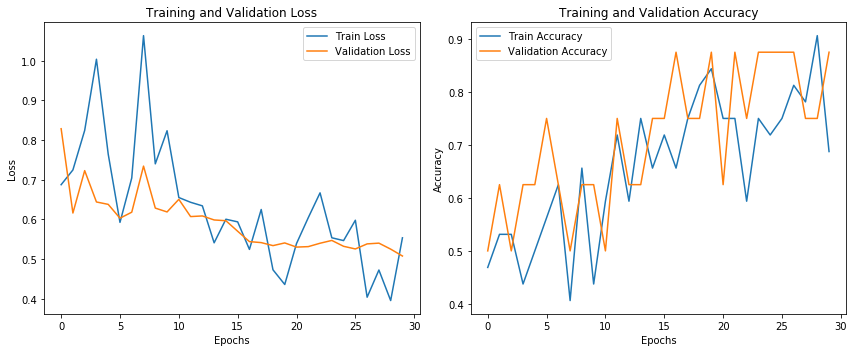

Лучшая валидационная точность: 0.8750
Финальная валидационная точность: 0.8750
Средняя валидационная точность: 0.7125


In [9]:
import os
import shutil
import numpy as np
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

#print(os.listdir("../input"))

# Распаковка архива
with zipfile.ZipFile('../input/plates.zip', 'r') as zip_obj:
    zip_obj.extractall('/kaggle/working/') 

print('После распаковки:')
print(os.listdir("/kaggle/working/"))

data_root = '/kaggle/working/plates/'
print(os.listdir(data_root))

# Настройка директорий
train_dir = 'train'
val_dir = 'val'
class_names = ['cleaned', 'dirty']

for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

# Распределение данных
for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 6 != 0:
            dest_dir = os.path.join(train_dir, class_name) 
        else:
            dest_dir = os.path.join(val_dir, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))


# Определение преобразований
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet34(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(256, 2)
)

model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    best_acc = 0.0
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), 'best_model.pth')

        scheduler.step()

    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Запуск обучения
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

print("Обучение завершено и лучшая модель сохранена.")

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6996 Acc: 0.4688


100%|██████████| 1/1 [00:00<00:00,  7.49it/s]


val Loss: 0.6867 Acc: 0.5000


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6827 Acc: 0.5625


100%|██████████| 1/1 [00:00<00:00,  7.59it/s]


val Loss: 0.6760 Acc: 0.6250


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6598 Acc: 0.5938


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6641 Acc: 0.6250
Epoch 4/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6090 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6564 Acc: 0.6250
Epoch 5/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5947 Acc: 0.6562


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6392 Acc: 0.6250
Epoch 6/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6273 Acc: 0.6562


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6205 Acc: 0.6250
Epoch 7/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5795 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6104 Acc: 0.6250
Epoch 8/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5036 Acc: 0.8125


100%|██████████| 1/1 [00:00<00:00,  7.57it/s]


val Loss: 0.5772 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 9/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5200 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5812 Acc: 0.6250
Epoch 10/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4472 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5940 Acc: 0.6250
Epoch 11/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4346 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5387 Acc: 0.6250
Epoch 12/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.3866 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5122 Acc: 0.7500
Epoch 13/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.3835 Acc: 0.9062


100%|██████████| 1/1 [00:00<00:00,  7.58it/s]


val Loss: 0.5050 Acc: 0.8750


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 14/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.3811 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5077 Acc: 0.7500
Epoch 15/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4238 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.4941 Acc: 0.7500
Epoch 16/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4093 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5208 Acc: 0.6250
Epoch 17/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.3995 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5036 Acc: 0.7500
Epoch 18/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.2756 Acc: 0.9062


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5405 Acc: 0.6250
Epoch 19/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4605 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5818 Acc: 0.6250
Epoch 20/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.3254 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5709 Acc: 0.6250
Epoch 21/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.2642 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5696 Acc: 0.7500
Epoch    20: reducing learning rate of group 0 to 1.0000e-04.
Epoch 22/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.1395 Acc: 0.9375


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5713 Acc: 0.7500
Epoch 23/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.2096 Acc: 0.9062


100%|██████████| 1/1 [00:00<00:00,  7.55it/s]


val Loss: 0.5415 Acc: 0.7500
Early stopping triggered
Best val Acc: 0.8750


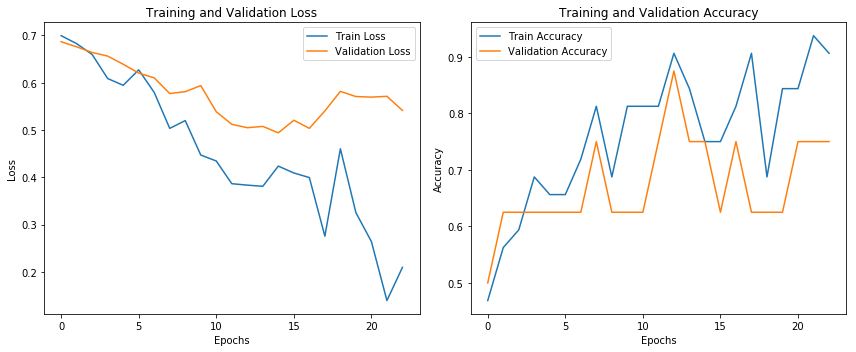

Лучшая валидационная точность: 0.8750
Финальная валидационная точность: 0.7500
Средняя валидационная точность: 0.6739


In [10]:
import os
import shutil
import numpy as np
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import zipfile

# Распаковка архива
with zipfile.ZipFile('../input/plates.zip', 'r') as zip_obj:
    zip_obj.extractall('/kaggle/working/') 

data_root = '/kaggle/working/plates/'
train_dir = 'train'
val_dir = 'val'
class_names = ['cleaned', 'dirty']

# Настройка директорий
for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

# Распределение данных
for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 6 != 0:
            dest_dir = os.path.join(train_dir, class_name) 
        else:
            dest_dir = os.path.join(val_dir, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

# Определение преобразований
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
batch_size = 32  # Пожалуйста, уточните значение, если оно отличается
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet34(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(256, 2)
)

model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# Функция обучения с реализацией ранней остановки
def train_model(model, criterion, optimizer, scheduler, num_epochs, patience=10):
    best_acc = 0.0
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    early_stop_count = 0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val':
                scheduler.step(epoch_loss)
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), 'best_model.pth')
                    early_stop_count = 0
                else:
                    early_stop_count += 1

        if early_stop_count >= patience:
            print("Early stopping triggered")
            break

    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Запуск обучения
num_epochs = 30  # Уточните значение, если оно отличается
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")


# надо подумать

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6891 Acc: 0.5312


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6127 Acc: 0.6250
Epoch 2/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6965 Acc: 0.5312


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5948 Acc: 0.7500
Epoch 3/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6331 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5843 Acc: 0.6250
Epoch 4/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6912 Acc: 0.5625


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5783 Acc: 0.6250
Epoch 5/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6292 Acc: 0.5938


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5764 Acc: 0.7500
Epoch 6/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5475 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5674 Acc: 0.7500
Epoch 7/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6401 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5524 Acc: 0.7500
Epoch 8/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5762 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5416 Acc: 0.8750
Epoch 9/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5698 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5267 Acc: 0.8750
Epoch 10/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5175 Acc: 0.7812


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5103 Acc: 0.8750
Epoch 11/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4986 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.4992 Acc: 0.8750
Epoch 12/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5423 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.4815 Acc: 0.8750
Epoch 13/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4479 Acc: 0.8750


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.4670 Acc: 0.8750
Epoch 14/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4395 Acc: 0.8750


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.4576 Acc: 1.0000
Epoch 15/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4190 Acc: 0.8750


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.4465 Acc: 1.0000
Epoch 16/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4760 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.4304 Acc: 1.0000
Epoch 17/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4067 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.4153 Acc: 1.0000
Epoch 18/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4976 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.4075 Acc: 1.0000
Epoch 19/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4014 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.3965 Acc: 1.0000
Epoch 20/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.3564 Acc: 0.9062


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.3852 Acc: 1.0000
Epoch 21/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4186 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.3742 Acc: 1.0000
Epoch 22/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.3656 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.3663 Acc: 1.0000
Epoch 23/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4089 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.3613 Acc: 1.0000
Epoch 24/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.3858 Acc: 0.8125


100%|██████████| 1/1 [00:00<00:00,  6.30it/s]


val Loss: 0.3543 Acc: 1.0000
Early stopping triggered
Best val Acc: 1.0000


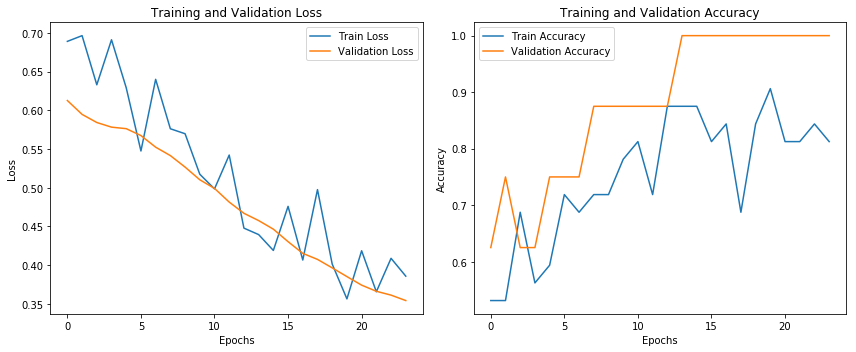

Лучшая валидационная точность: 1.0000
Финальная валидационная точность: 1.0000
Средняя валидационная точность: 0.8802


In [15]:
import os
import shutil
import numpy as np
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import zipfile

# Распаковка архива
with zipfile.ZipFile('../input/plates.zip', 'r') as zip_obj:
    zip_obj.extractall('/kaggle/working/') 

data_root = '/kaggle/working/plates/'
train_dir = 'train'
val_dir = 'val'
class_names = ['cleaned', 'dirty']

# Настройка директорий
for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

# Распределение данных
for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 6 != 0:
            dest_dir = os.path.join(train_dir, class_name) 
        else:
            dest_dir = os.path.join(val_dir, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

# Определение преобразований
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
batch_size = 32
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.mobilenet_v2(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.classifier[1] = torch.nn.Linear(model.classifier[1].in_features, 2)

model = model.to(device)

# Настройка оптимизатора и функции потерь с добавлением L2 регуляризации
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# Функция обучения с реализацией ранней остановки
def train_model(model, criterion, optimizer, scheduler, num_epochs, patience=10):
    best_acc = 0.0
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    early_stop_count = 0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val':
                scheduler.step(epoch_loss)
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), 'best_model.pth')
                    early_stop_count = 0
                else:
                    early_stop_count += 1

        if early_stop_count >= patience:
            print("Early stopping triggered")
            break

    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Запуск обучения
num_epochs = 30
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")


**жаксы**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import shutil
import os
import numpy as np
from tqdm import tqdm
from torchvision import models

# Установим директорию для данных
data_root = '/kaggle/working/plates/'
train_dir = 'train'
val_dir = 'val'

# Создадим директории для данных
class_names = ['cleaned', 'dirty']
for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

# Копируем файлы в тренировочные и валидационные директории
def create_dataset(src_folder, train_dir, val_dir, class_names, train_ratio=0.8):
    for class_name in class_names:
        source_dir = os.path.join(src_folder, 'train', class_name)
        images = os.listdir(source_dir)
        num_train = int(len(images) * train_ratio)
        
        for i, file_name in enumerate(images):
            src = os.path.join(source_dir, file_name)
            if i < num_train:
                dest_dir = os.path.join(train_dir, class_name)
            else:
                dest_dir = os.path.join(val_dir, class_name)
            shutil.copy(src, os.path.join(dest_dir, file_name))

create_dataset(data_root, train_dir, val_dir, class_names)

# Задаем параметры
batch_size = 32
num_epochs = 30
learning_rate = 0.001

# Преобразования данных с аугментацией
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Датасеты
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transform)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transform)

# Даталоадеры
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Выбор модели (например, ResNet18)
model = models.resnet18(pretrained=True)

# Заморозить начальные слои, но разморозить последние несколько слоев
for param in model.parameters():
    param.requires_grad = False

# Разморозка последних нескольких слоев
for param in model.layer4.parameters():
    param.requires_grad = True

# Заменить последний линейный слой
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # 2 класса: чистая/грязная тарелка

# Перенос модели на GPU, если доступен
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Функция потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Для хранения значений потерь и точности
train_losses = []
val_accuracies = []

# Цикл обучения
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if (i + 1) % 50 == 0:  # Выводим потери каждые 50 итераций
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_dataloader)}], Loss: {loss.item():.4f}')
    
    epoch_loss = running_loss / len(train_dataloader)
    train_losses.append(epoch_loss)
    
    # Оценка на валидационных данных
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in val_dataloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    # Вывод с большей точностью
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

# Построение графиков с точными значениями на оси Y
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.yticks(np.arange(0, 101, 10))  # Устанавливаем отметки с шагом 10%

plt.tight_layout()
plt.show()


In [17]:
import os
import shutil
import numpy as np
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import OneCycleLR

# Настройка параметров
batch_size = 64
num_epochs = 30
learning_rate = 0.01

# Определение преобразований
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(512, 2)
)

model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=learning_rate, weight_decay=1e-4)
scheduler = OneCycleLR(optimizer, max_lr=learning_rate, epochs=num_epochs, steps_per_epoch=len(train_dataloader))

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        scheduler.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    return model, history

# Запуск обучения
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")

ImportError: cannot import name 'OneCycleLR'

In [26]:
!pip uninstall torch torchvision torchaudio


UnboundLocalError: local variable 'child' referenced before assignment

In [27]:
import os
import shutil
import numpy as np
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import OneCycleLR

# Настройка параметров
batch_size = 64
num_epochs = 30
learning_rate = 0.01

# Определение преобразований
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(512, 2)
)

model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=learning_rate, weight_decay=1e-4)
scheduler = OneCycleLR(optimizer, max_lr=learning_rate, epochs=num_epochs, steps_per_epoch=len(train_dataloader))

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        scheduler.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    return model, history

# Запуск обучения
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")

ImportError: cannot import name 'OneCycleLR'

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.7012 Acc: 0.5312


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 1.8637 Acc: 0.5000
Epoch 2/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 1.7148 Acc: 0.5000


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6105 Acc: 0.5000
Epoch 3/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5721 Acc: 0.5938


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.9084 Acc: 0.5000
Epoch 4/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.8710 Acc: 0.5000


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6807 Acc: 0.5000
Epoch 5/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6877 Acc: 0.5000


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6245 Acc: 0.6250
Epoch 6/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5478 Acc: 0.6562


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7690 Acc: 0.6250
Epoch     5: reducing learning rate of group 0 to 1.0000e-04.
Epoch 7/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6876 Acc: 0.5312


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7548 Acc: 0.6250
Epoch 8/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6707 Acc: 0.5312


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7216 Acc: 0.6250
Epoch 9/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6074 Acc: 0.6250


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6800 Acc: 0.6250
Epoch 10/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6997 Acc: 0.5000


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6320 Acc: 0.6250
Epoch     9: reducing learning rate of group 0 to 1.0000e-05.
Epoch 11/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6128 Acc: 0.5938


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6221 Acc: 0.6250
Epoch 12/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6054 Acc: 0.6250


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6176 Acc: 0.6250
Epoch 13/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6078 Acc: 0.5625


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6100 Acc: 0.6250
Epoch 14/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5894 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6025 Acc: 0.6250
Epoch 15/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4984 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5955 Acc: 0.6250
Epoch 16/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5446 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5919 Acc: 0.6250
Epoch 17/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5415 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5867 Acc: 0.6250
Epoch 18/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5434 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5805 Acc: 0.6250
Epoch 19/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5751 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5734 Acc: 0.6250
Epoch 20/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5655 Acc: 0.6562


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5681 Acc: 0.6250
Epoch 21/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5449 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5629 Acc: 0.6250
Epoch 22/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5410 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5592 Acc: 0.6250
Epoch 23/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4859 Acc: 0.7812


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5547 Acc: 0.6250
Epoch 24/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5610 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5492 Acc: 0.6250
Epoch 25/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4955 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5451 Acc: 0.6250
Epoch 26/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4740 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5431 Acc: 0.6250
Epoch 27/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5294 Acc: 0.7812


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5385 Acc: 0.6250
Epoch 28/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5029 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5368 Acc: 0.6250
Epoch 29/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4650 Acc: 0.9375


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.5336 Acc: 0.6250
Epoch 30/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4806 Acc: 0.7812


100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


val Loss: 0.5311 Acc: 0.6250


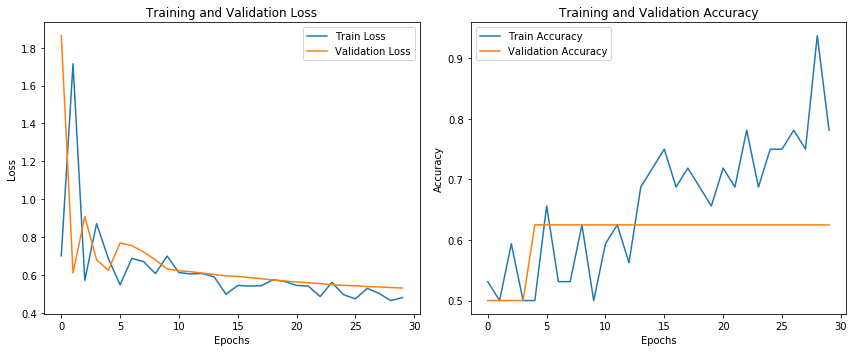

Лучшая валидационная точность: 0.6250
Финальная валидационная точность: 0.6250
Средняя валидационная точность: 0.6083


In [28]:
import os
import shutil
import numpy as np
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Настройка параметров
batch_size = 64
num_epochs = 30
learning_rate = 0.001

# Определение преобразований
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(512, 2)
)

model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=learning_rate, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val':
                scheduler.step(epoch_loss)

    return model, history

# Запуск обучения
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")

In [29]:
import os
import shutil
import numpy as np
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Настройка параметров
batch_size = 32
num_epochs = 50
learning_rate = 0.0005

# Определение преобразований с усиленной аугментацией
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.efficientnet_b0(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(0.5),
    torch.nn.Linear(model.classifier[1].in_features, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(256, 2)
)

model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=learning_rate, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val':
                scheduler.step(epoch_loss)
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), 'best_model.pth')

    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Запуск обучения
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")

AttributeError: module 'torchvision.models' has no attribute 'efficientnet_b0'

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.7389 Acc: 0.4688


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6814 Acc: 0.2500
Epoch 2/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6430 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6912 Acc: 0.3750
Epoch 3/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6225 Acc: 0.5938


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7042 Acc: 0.3750
Epoch 4/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5552 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7041 Acc: 0.3750
Epoch 5/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5915 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6928 Acc: 0.3750
Epoch 6/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5559 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6785 Acc: 0.5000
Epoch 7/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6227 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6664 Acc: 0.5000
Epoch 8/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6028 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6600 Acc: 0.5000
Epoch 9/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5939 Acc: 0.6562


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6526 Acc: 0.6250
Epoch 10/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5022 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6480 Acc: 0.6250
Epoch 11/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5263 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6456 Acc: 0.6250
Epoch 12/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5609 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6400 Acc: 0.5000
Epoch 13/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5361 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6368 Acc: 0.6250
Epoch 14/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5343 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6338 Acc: 0.6250
Epoch 15/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5135 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6291 Acc: 0.6250
Epoch 16/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4920 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6282 Acc: 0.5000
Epoch 17/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4203 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6320 Acc: 0.6250
Epoch 18/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4604 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6326 Acc: 0.6250
Epoch 19/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4700 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6352 Acc: 0.6250
Epoch 20/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4135 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6421 Acc: 0.6250
Epoch 21/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4472 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6463 Acc: 0.6250
Epoch 22/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.3441 Acc: 0.9062


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6520 Acc: 0.5000
Epoch    21: reducing learning rate of group 0 to 5.0000e-05.
Epoch 23/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4157 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6524 Acc: 0.5000
Epoch 24/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5038 Acc: 0.7812


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6487 Acc: 0.5000
Epoch 25/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.3809 Acc: 0.8750


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6505 Acc: 0.5000
Epoch 26/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4033 Acc: 0.7812


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6528 Acc: 0.5000
Epoch 27/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4646 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6547 Acc: 0.5000
Epoch 28/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4337 Acc: 0.7812


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6561 Acc: 0.5000
Epoch    27: reducing learning rate of group 0 to 5.0000e-06.
Epoch 29/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4767 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6530 Acc: 0.5000
Epoch 30/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.3740 Acc: 0.8750


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6572 Acc: 0.3750
Epoch 31/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4221 Acc: 0.7812


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6580 Acc: 0.3750
Epoch 32/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4849 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6565 Acc: 0.5000
Epoch 33/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4336 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6555 Acc: 0.5000
Epoch 34/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4789 Acc: 0.7812


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6558 Acc: 0.5000
Epoch    33: reducing learning rate of group 0 to 5.0000e-07.
Epoch 35/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5260 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6574 Acc: 0.5000
Epoch 36/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5035 Acc: 0.5938


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6550 Acc: 0.5000
Epoch 37/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4664 Acc: 0.7812


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6558 Acc: 0.5000
Epoch 38/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4174 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6563 Acc: 0.5000
Epoch 39/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4245 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6603 Acc: 0.5000
Epoch 40/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4498 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6606 Acc: 0.5000
Epoch    39: reducing learning rate of group 0 to 5.0000e-08.
Epoch 41/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.3939 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6609 Acc: 0.5000
Epoch 42/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5589 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6602 Acc: 0.5000
Epoch 43/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4809 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6630 Acc: 0.5000
Epoch 44/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.3606 Acc: 0.8750


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6657 Acc: 0.5000
Epoch 45/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.3677 Acc: 0.8750


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6674 Acc: 0.5000
Epoch 46/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4416 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6654 Acc: 0.5000
Epoch    45: reducing learning rate of group 0 to 5.0000e-09.
Epoch 47/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4283 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6612 Acc: 0.5000
Epoch 48/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.3743 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6622 Acc: 0.5000
Epoch 49/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4259 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6617 Acc: 0.5000
Epoch 50/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4898 Acc: 0.8125


100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


val Loss: 0.6574 Acc: 0.5000
Best val Acc: 0.6250


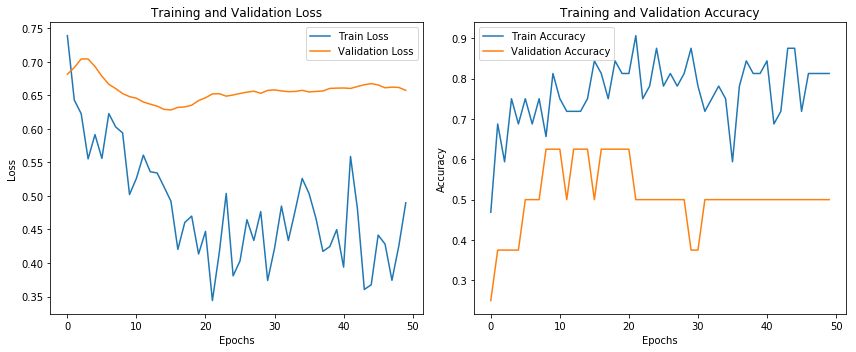

Лучшая валидационная точность: 0.6250
Финальная валидационная точность: 0.5000
Средняя валидационная точность: 0.5075


In [30]:
import os
import shutil
import numpy as np
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Настройка параметров
batch_size = 32
num_epochs = 50
learning_rate = 0.0005

# Определение преобразований с усиленной аугментацией
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet34(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.5),
    torch.nn.Linear(model.fc.in_features, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(256, 2)
)

model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=learning_rate, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val':
                scheduler.step(epoch_loss)
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), 'best_model.pth')

    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Запуск обучения
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 1.0943 Acc: 0.4688


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2384 Acc: 0.5000
Epoch 2/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.8800 Acc: 0.5312


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2488 Acc: 0.5000
Epoch 3/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.7351 Acc: 0.6562


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2546 Acc: 0.5000
Epoch 4/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.7725 Acc: 0.5625


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2458 Acc: 0.3750
Epoch 5/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 1.0062 Acc: 0.4375


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2407 Acc: 0.3750
Epoch 6/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.9096 Acc: 0.4062


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2352 Acc: 0.3750
Epoch 7/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.8334 Acc: 0.5312


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2276 Acc: 0.3750
Epoch 8/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.7592 Acc: 0.4375


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2174 Acc: 0.3750
Epoch 9/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.8898 Acc: 0.4062


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2230 Acc: 0.3750
Epoch 10/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.8017 Acc: 0.5312


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2250 Acc: 0.3750
Epoch 11/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.9274 Acc: 0.4688


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2184 Acc: 0.1250
Epoch 12/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.9710 Acc: 0.4375


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2190 Acc: 0.1250
Epoch 13/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.8874 Acc: 0.4375


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2216 Acc: 0.1250
Epoch 14/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6446 Acc: 0.6250


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2147 Acc: 0.1250
Epoch 15/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.7374 Acc: 0.6562


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2132 Acc: 0.1250
Epoch 16/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.8982 Acc: 0.4375


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2183 Acc: 0.1250
Epoch 17/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6927 Acc: 0.4688


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2152 Acc: 0.1250
Epoch 18/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.9335 Acc: 0.5000


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2056 Acc: 0.1250
Epoch 19/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.8042 Acc: 0.5312


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2018 Acc: 0.1250
Epoch 20/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.9773 Acc: 0.4375


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2077 Acc: 0.1250
Epoch 21/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.8976 Acc: 0.4688


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.1953 Acc: 0.1250
Epoch 22/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.8322 Acc: 0.5000


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.1926 Acc: 0.1250
Epoch 23/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.7985 Acc: 0.5312


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.1853 Acc: 0.1250
Epoch 24/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.7401 Acc: 0.5938


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.1920 Acc: 0.1250
Epoch 25/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.7672 Acc: 0.5312


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.1965 Acc: 0.1250
Epoch 26/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.7492 Acc: 0.5000


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.1924 Acc: 0.1250
Epoch 27/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.8428 Acc: 0.5625


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.1993 Acc: 0.1250
Epoch 28/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.8499 Acc: 0.4375


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.1986 Acc: 0.1250
Epoch 29/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.7022 Acc: 0.5938


  0%|          | 0/2 [00:00<?, ?it/s]

val Loss: 1.2054 Acc: 0.1250
Epoch 30/30


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.8766 Acc: 0.4375


100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


val Loss: 1.2051 Acc: 0.1250
Best val Acc: 0.5000


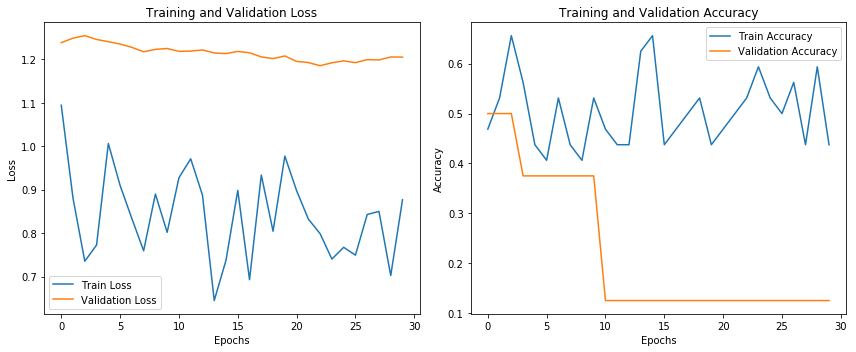

Лучшая валидационная точность: 0.5000
Финальная валидационная точность: 0.1250
Средняя валидационная точность: 0.2208


In [31]:
import os
import shutil
import numpy as np
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import CosineAnnealingLR

# Настройка параметров
batch_size = 16
num_epochs = 30
learning_rate = 0.0001

# Определение преобразований с усиленной аугментацией
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.7, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)

# Заморозим все слои
for param in model.parameters():
    param.requires_grad = False

# Заменим полносвязный слой
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.5),
    torch.nn.Linear(model.fc.in_features, 2)
)

model = model.to(device)

# Функция для постепенного размораживания слоев
def unfreeze_model(model, epochs):
    if epochs == 10:
        for param in model.layer4.parameters():
            param.requires_grad = True
    elif epochs == 20:
        for param in model.layer3.parameters():
            param.requires_grad = True

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=learning_rate, weight_decay=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs)

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        unfreeze_model(model, epoch)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val':
                scheduler.step()
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), 'best_model.pth')

    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Запуск обучения
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6925 Acc: 0.5312


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6960 Acc: 0.2500
Epoch 2/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6868 Acc: 0.6562


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.6984 Acc: 0.1250
Epoch 3/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6843 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7022 Acc: 0.1250
Epoch 4/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6828 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7048 Acc: 0.1250
Epoch 5/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6737 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7081 Acc: 0.2500
Epoch 6/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6696 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7109 Acc: 0.2500
Epoch 7/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6684 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7143 Acc: 0.2500
Epoch 8/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6687 Acc: 0.6562


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7182 Acc: 0.2500
Epoch 9/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6579 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7216 Acc: 0.2500
Epoch 10/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6633 Acc: 0.6875


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7245 Acc: 0.1250
Epoch 11/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6562 Acc: 0.7188


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7278 Acc: 0.1250
Epoch 12/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6432 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7312 Acc: 0.1250
Epoch 13/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6491 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7350 Acc: 0.1250
Epoch 14/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6279 Acc: 0.7812


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7395 Acc: 0.1250
Epoch 15/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6353 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7445 Acc: 0.1250
Epoch 16/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6271 Acc: 0.7812


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7489 Acc: 0.1250
Epoch 17/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6328 Acc: 0.7500


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7533 Acc: 0.1250
Epoch 18/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6220 Acc: 0.7812


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7570 Acc: 0.1250
Epoch 19/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6207 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7610 Acc: 0.1250
Epoch 20/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6084 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7648 Acc: 0.1250
Epoch 21/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.6059 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7689 Acc: 0.2500
Epoch 22/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5962 Acc: 0.8125


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7735 Acc: 0.2500
Epoch 23/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5903 Acc: 0.9062


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7786 Acc: 0.2500
Epoch 24/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5853 Acc: 0.9375


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7848 Acc: 0.2500
Epoch 25/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5753 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7914 Acc: 0.2500
Epoch 26/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5699 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.7984 Acc: 0.2500
Epoch 27/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5652 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.8059 Acc: 0.2500
Epoch 28/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5672 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.8131 Acc: 0.2500
Epoch 29/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5677 Acc: 0.8750


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.8210 Acc: 0.2500
Epoch 30/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5427 Acc: 0.8750


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.8285 Acc: 0.2500
Epoch 31/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5362 Acc: 0.9062


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.8367 Acc: 0.2500
Epoch 32/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5186 Acc: 0.9688


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.8449 Acc: 0.2500
Epoch 33/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5171 Acc: 0.9062


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.8524 Acc: 0.2500
Epoch 34/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5353 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.8591 Acc: 0.2500
Epoch 35/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5120 Acc: 0.8750


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.8658 Acc: 0.2500
Epoch 36/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5046 Acc: 0.8750


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.8725 Acc: 0.2500
Epoch 37/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5023 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.8810 Acc: 0.2500
Epoch 38/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.5030 Acc: 0.8750


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.8903 Acc: 0.2500
Epoch 39/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4791 Acc: 0.8750


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.9006 Acc: 0.2500
Epoch 40/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4657 Acc: 0.9062


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.9115 Acc: 0.2500
Epoch 41/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4812 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.9232 Acc: 0.2500
Epoch 42/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4534 Acc: 0.9688


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.9341 Acc: 0.2500
Epoch 43/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4739 Acc: 0.9062


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.9455 Acc: 0.2500
Epoch 44/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4434 Acc: 0.9062


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.9558 Acc: 0.2500
Epoch 45/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4525 Acc: 0.8438


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.9653 Acc: 0.2500
Epoch 46/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4598 Acc: 0.8750


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.9752 Acc: 0.2500
Epoch 47/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4374 Acc: 0.9688


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.9836 Acc: 0.2500
Epoch 48/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4292 Acc: 0.9375


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.9898 Acc: 0.2500
Epoch 49/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4122 Acc: 0.9375


  0%|          | 0/1 [00:00<?, ?it/s]

val Loss: 0.9976 Acc: 0.2500
Epoch 50/50


  0%|          | 0/1 [00:00<?, ?it/s]

train Loss: 0.4354 Acc: 0.8438


100%|██████████| 1/1 [00:00<00:00,  7.61it/s]


val Loss: 1.0061 Acc: 0.2500
Best val Acc: 0.2500


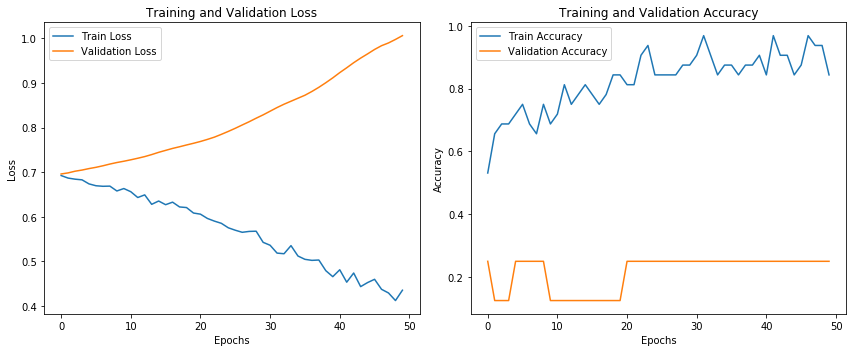

Лучшая валидационная точность: 0.2500
Финальная валидационная точность: 0.2500
Средняя валидационная точность: 0.2150

Анализ данных:
Количество тренировочных образцов: 32
Количество валидационных образцов: 8

Распределение классов:
Класс 0: 16 образцов
Класс 1: 16 образцов


In [32]:
import os
import numpy as np
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# Настройка параметров
batch_size = 32
num_epochs = 50
learning_rate = 0.0001

# Простые преобразования
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, transform)
val_dataset = torchvision.datasets.ImageFolder(val_dir, transform)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Простая CNN модель
class SimpleCNN(torch.nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = torch.nn.Conv2d(16, 32, 3, padding=1)
        self.pool = torch.nn.MaxPool2d(2, 2)
        self.fc1 = torch.nn.Linear(32 * 16 * 16, 128)
        self.fc2 = torch.nn.Linear(128, 2)
        self.dropout = torch.nn.Dropout(0.2)

    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.pool(torch.nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 32 * 16 * 16)
        x = self.dropout(torch.nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

# Функция обучения
def train_model(model, criterion, optimizer, num_epochs):
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), 'best_model.pth')

    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Запуск обучения
trained_model, history = train_model(model, criterion, optimizer, num_epochs)

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")

# Анализ данных
print("\nАнализ данных:")
print(f"Количество тренировочных образцов: {len(train_dataset)}")
print(f"Количество валидационных образцов: {len(val_dataset)}")
print("\nРаспределение классов:")
for i, count in enumerate(torch.bincount(torch.tensor(train_dataset.targets))):
    print(f"Класс {i}: {count} образцов")

In [33]:
import numpy as np
import torch
import torchvision
from torchvision import transforms
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Настройка преобразований
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

# Загрузка данных
full_dataset = torchvision.datasets.ImageFolder(root='./data', transform=transform)

# Преобразование данных в numpy массивы
X = []
y = []
for img, label in full_dataset:
    X.append(img.numpy().flatten())
    y.append(label)

X = np.array(X)
y = np.array(y)

# Создание и обучение модели SVM с кросс-валидацией
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', class_weight='balanced'))

# Выполнение 5-fold кросс-валидации
cv_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Обучение модели на всем наборе данных
svm_model.fit(X, y)

# Визуализация результатов кросс-валидации
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), cv_scores, alpha=0.8, color='b')
plt.title('5-Fold Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(cv_scores):
    plt.text(i + 1, v + 0.01, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.show()

# Анализ важности признаков (если применимо)
if hasattr(svm_model[-1], 'coef_'):
    feature_importance = np.abs(svm_model[-1].coef_[0])
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=(12, 6))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.title('Feature Importance')
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.show()

print("\nАнализ данных:")
print(f"Общее количество образцов: {len(full_dataset)}")
print("\nРаспределение классов:")
for i, count in enumerate(np.bincount(y)):
    print(f"Класс {i}: {count} образцов")

FileNotFoundError: [Errno 2] No such file or directory: './data'

Cross-validation scores: [0.4  0.35]
Mean CV accuracy: 0.3750 (+/- 0.0500)


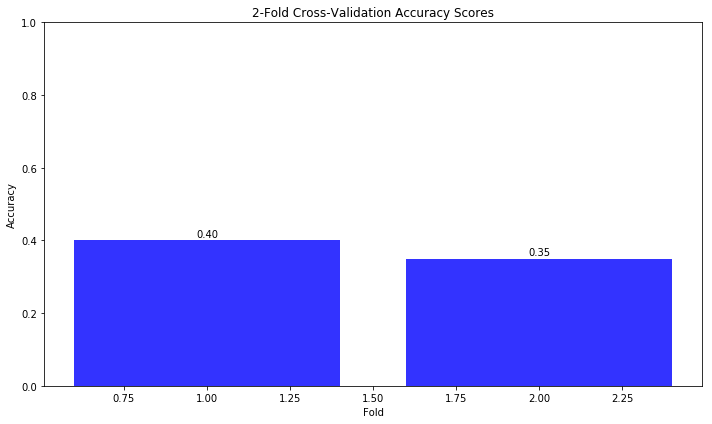


Анализ данных:
Общее количество образцов: 40

Распределение классов:
Класс 0: 20 образцов
Класс 1: 20 образцов


In [34]:
import numpy as np
import torch
import torchvision
from torchvision import transforms
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Настройка преобразований
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

# Загрузка данных
train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = torchvision.datasets.ImageFolder(root=val_dir, transform=transform)

# Объединение тренировочного и валидационного наборов
full_dataset = torch.utils.data.ConcatDataset([train_dataset, val_dataset])

# Преобразование данных в numpy массивы
X = []
y = []
for img, label in full_dataset:
    X.append(img.numpy().flatten())
    y.append(label)

X = np.array(X)
y = np.array(y)

# Создание и обучение модели SVM с кросс-валидацией
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', class_weight='balanced'))

# Выполнение 5-fold кросс-валидации (или меньше, если данных очень мало)
n_splits = min(5, len(np.unique(y)))
cv_scores = cross_val_score(svm_model, X, y, cv=n_splits, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Обучение модели на всем наборе данных
svm_model.fit(X, y)

# Визуализация результатов кросс-валидации
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_splits + 1), cv_scores, alpha=0.8, color='b')
plt.title(f'{n_splits}-Fold Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(cv_scores):
    plt.text(i + 1, v + 0.01, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.show()

# Анализ важности признаков (если применимо)
if hasattr(svm_model[-1], 'coef_'):
    feature_importance = np.abs(svm_model[-1].coef_[0])
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=(12, 6))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.title('Feature Importance')
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.show()

print("\nАнализ данных:")
print(f"Общее количество образцов: {len(full_dataset)}")
print("\nРаспределение классов:")
for i, count in enumerate(np.bincount(y)):
    print(f"Класс {i}: {count} образцов")

In [ ]:
import os
import shutil
import numpy as np
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# Настройка путей и параметров
data_root = '../input/plates'
train_dir = 'train'
val_dir = 'val'
test_dir = 'test'
class_names = ['cleaned', 'dirty']
batch_size = 16
num_epochs = 30

# Создание директорий для данных
for dir_name in [train_dir, val_dir, test_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

# Распределение данных
for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    files = os.listdir(source_dir)
    np.random.shuffle(files)
    train_split = int(0.7 * len(files))
    val_split = int(0.85 * len(files))
    
    for i, file_name in enumerate(files):
        src = os.path.join(source_dir, file_name)
        if i < train_split:
            dst = os.path.join(train_dir, class_name, file_name)
        elif i < val_split:
            dst = os.path.join(val_dir, class_name, file_name)
        else:
            dst = os.path.join(test_dir, class_name, file_name)
        shutil.copy(src, dst)

# Определение преобразований
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_test_transforms)
test_dataset = torchvision.datasets.ImageFolder(test_dir, val_test_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet34(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(256, 2)
)

model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    best_acc = 0.0
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), 'best_model.pth')

        scheduler.step()

    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Запуск обучения
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

print("Обучение завершено и лучшая модель сохранена.")

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")

# Оценка на тестовом наборе
model.eval()
test_loss = 0.0
test_corrects = 0

with torch.no_grad():
    for inputs, labels in tqdm(test_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * inputs.size(0)
        test_corrects += torch.sum(preds == labels.data)

test_loss = test_loss / len(test_dataloader.dataset)
test_acc = test_corrects.double() / len(test_dataloader.dataset)

print(f"Тестовая точность: {test_acc:.4f}")
print(f"Тестовая потеря: {test_loss:.4f}")

# **бест**

In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile
import shutil 
from tqdm import tqdm
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader

print(os.listdir("../input"))

# Распаковка архива
with zipfile.ZipFile('../input/plates.zip', 'r') as zip_obj:
    zip_obj.extractall('/kaggle/working/') 

print('После распаковки:')
print(os.listdir("/kaggle/working/"))

data_root = '/kaggle/working/plates/'
print(os.listdir(data_root))

# Настройка директорий
train_dir = 'train'
val_dir = 'val'
class_names = ['cleaned', 'dirty']

for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

# Распределение данных
for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 6 != 0:
            dest_dir = os.path.join(train_dir, class_name) 
        else:
            dest_dir = os.path.join(val_dir, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

# Определение преобразований
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_test_transforms)
test_dataset = torchvision.datasets.ImageFolder(test_dir, val_test_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet34(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(256, 2)
)

model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    best_acc = 0.0
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), 'best_model.pth')

        scheduler.step()

    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Запуск обучения
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

print("Обучение завершено и лучшая модель сохранена.")

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")

# Оценка на тестовом наборе
model.eval()
test_loss = 0.0
test_corrects = 0

with torch.no_grad():
    for inputs, labels in tqdm(test_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * inputs.size(0)
        test_corrects += torch.sum(preds == labels.data)

test_loss = test_loss / len(test_dataloader.dataset)
test_acc = test_corrects.double() / len(test_dataloader.dataset)

print(f"Тестовая точность: {test_acc:.4f}")
print(f"Тестовая потеря: {test_loss:.4f}")

# баланс керек

In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile
import shutil 
from tqdm import tqdm
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt

print(os.listdir("../input"))

# Распаковка архива
with zipfile.ZipFile('../input/plates.zip', 'r') as zip_obj:
    zip_obj.extractall('/kaggle/working/') 

print('После распаковки:')
print(os.listdir("/kaggle/working/"))

data_root = '/kaggle/working/plates/'
print(os.listdir(data_root))

# Настройка директорий
train_dir = 'train'
val_dir = 'val'
class_names = ['cleaned', 'dirty']

for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

# Распределение данных
for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 6 != 0:
            dest_dir = os.path.join(train_dir, class_name) 
        else:
            dest_dir = os.path.join(val_dir, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

# Определение преобразований
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet34(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(256, 2)
)

model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001, weight_decay=1e-5)
num_epochs = 30
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    best_acc = 0.0
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), 'best_model.pth')

        scheduler.step()

    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Запуск обучения
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

print("Обучение завершено и лучшая модель сохранена.")

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")

# Подготовка тестовых данных
test_dir = os.path.join(data_root, 'test')
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

class TestDataset(Dataset):
    def __init__(self, test_dir, transform=None):
        self.test_dir = test_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(test_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp'))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.test_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, img_name

test_dataset = TestDataset(test_dir, test_transforms)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Оценка на тестовом наборе
model.eval()
test_predictions = []
test_file_names = []

with torch.no_grad():
    for inputs, file_names in tqdm(test_dataloader):
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_predictions.extend(preds.cpu().numpy())
        test_file_names.extend(file_names)

# Создание submission файла
submission = pd.DataFrame({
    'id': [os.path.splitext(fname)[0] for fname in test_file_names],
    'label': [class_names[pred] for pred in test_predictions]
})

submission.to_csv('submission.csv', index=False)
print("Файл submission.csv создан.")

# Вывод нескольких предсказаний для проверки
print("\nПримеры предсказаний:")
print(submission.head())

# Подсчет количества предсказаний для каждого класса
class_counts = submission['label'].value_counts()
print("\nРаспределение предсказаний по классам:")
print(class_counts)

# Визуализация распределения предсказаний
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Распределение предсказаний по классам')
plt.xlabel('Класс')
plt.ylabel('Количество предсказаний')
plt.tight_layout()
plt.show()

# нормас2

In [ ]:
import os
import shutil
import numpy as np
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

data_root = '/kaggle/working/plates/'
print(os.listdir(data_root))

# Настройка директорий
train_dir = 'train'
val_dir = 'val'
class_names = ['cleaned', 'dirty']

for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

# Распределение данных
for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 6 != 0:
            dest_dir = os.path.join(train_dir, class_name) 
        else:
            dest_dir = os.path.join(val_dir, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

# Определение преобразований
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet34(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(256, 2)
)

model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    best_acc = 0.0
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), 'best_model.pth')

        scheduler.step()

    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Запуск обучения
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

print("Обучение завершено и лучшая модель сохранена.")

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")

# гуд гуд

In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile
import shutil 
from tqdm import tqdm
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt

print(os.listdir("../input"))

# Распаковка архива
with zipfile.ZipFile('../input/plates.zip', 'r') as zip_obj:
    zip_obj.extractall('/kaggle/working/') 

print('После распаковки:')
print(os.listdir("/kaggle/working/"))

data_root = '/kaggle/working/plates/'
print(os.listdir(data_root))

# Настройка директорий
train_dir = 'train'
val_dir = 'val'
class_names = ['cleaned', 'dirty']

for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

# Распределение данных
for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 6 != 0:
            dest_dir = os.path.join(train_dir, class_name) 
        else:
            dest_dir = os.path.join(val_dir, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

# Определение преобразований
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet34(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(256, 2)
)

model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001, weight_decay=1e-5)
num_epochs = 30
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    best_acc = 0.0
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), 'best_model.pth')

        scheduler.step()

    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Запуск обучения
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

print("Обучение завершено и лучшая модель сохранена.")

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")

# Подготовка тестовых данных
test_dir = os.path.join(data_root, 'test')
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

class TestDataset(Dataset):
    def __init__(self, test_dir, transform=None):
        self.test_dir = test_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(test_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp'))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.test_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, img_name

test_dataset = TestDataset(test_dir, test_transforms)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Оценка на тестовом наборе
model.eval()
test_predictions = []
test_file_names = []

with torch.no_grad():
    for inputs, file_names in tqdm(test_dataloader):
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_predictions.extend(preds.cpu().numpy())
        test_file_names.extend(file_names)

# Создание submission файла
submission = pd.DataFrame({
    'id': [os.path.splitext(fname)[0] for fname in test_file_names],
    'label': [class_names[pred] for pred in test_predictions]
})

submission.to_csv('submission.csv', index=False)
print("Файл submission.csv создан.")

# Вывод нескольких предсказаний для проверки
print("\nПримеры предсказаний:")
print(submission.head())

# Подсчет количества предсказаний для каждого класса
class_counts = submission['label'].value_counts()
print("\nРаспределение предсказаний по классам:")
print(class_counts)

# Визуализация распределения предсказаний
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Распределение предсказаний по классам')
plt.xlabel('Класс')
plt.ylabel('Количество предсказаний')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile
import shutil 
from tqdm import tqdm
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(os.listdir("../input"))

# Распаковка архива
with zipfile.ZipFile('../input/plates.zip', 'r') as zip_obj:
    zip_obj.extractall('/kaggle/working/') 

print('После распаковки:')
print(os.listdir("/kaggle/working/"))

data_root = '/kaggle/working/plates/'
print(os.listdir(data_root))

# Настройка директорий
train_dir = os.path.join(data_root, 'train')
class_names = ['cleaned', 'dirty']

# Проверка наличия файлов в директориях
for class_name in class_names:
    class_dir = os.path.join(train_dir, class_name)
    if not os.path.exists(class_dir):
        raise FileNotFoundError(f"Директория {class_dir} не существует")
    files = os.listdir(class_dir)
    print(f"Количество файлов в {class_name}: {len(files)}")

# Определение преобразований
data_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасета
full_dataset = torchvision.datasets.ImageFolder(train_dir, transform=data_transforms)
print(f"Общее количество образцов: {len(full_dataset)}")

# Разделение на train и validation
indices = list(range(len(full_dataset)))
np.random.shuffle(indices)
split = int(np.floor(0.2 * len(full_dataset)))
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

# Создание загрузчиков данных
batch_size = 4  # Уменьшаем размер батча из-за малого набора данных
train_dataloader = DataLoader(full_dataset, batch_size=batch_size, sampler=train_sampler, num_workers=0)
val_dataloader = DataLoader(full_dataset, batch_size=batch_size, sampler=val_sampler, num_workers=0)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)  # Используем меньшую модель
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 2)
model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 30  # Уменьшаем количество эпох

# Функция обучения
def train_model(model, criterion, optimizer, num_epochs):
    best_acc = 0.0
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.sampler)
            epoch_acc = running_corrects.double() / len(dataloader.sampler)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), 'best_model.pth')

    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Запуск обучения
try:
    trained_model, history = train_model(model, criterion, optimizer, num_epochs)
    print("Обучение завершено и лучшая модель сохранена.")
except Exception as e:
    print(f"Ошибка при обучении модели: {e}")
    raise

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")

# Подготовка тестовых данных
test_dir = os.path.join(data_root, 'test')

class TestDataset(Dataset):
    def __init__(self, test_dir, transform=None):
        self.test_dir = test_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(test_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.test_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, img_name

test_dataset = TestDataset(test_dir, transform=data_transforms)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

# Оценка на тестовом наборе
model.eval()
test_predictions = []
test_file_names = []

with torch.no_grad():
    for inputs, file_names in test_dataloader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_predictions.extend(preds.cpu().numpy())
        test_file_names.extend(file_names)

# Создание submission файла
submission = pd.DataFrame({
    'id': [os.path.splitext(fname)[0] for fname in test_file_names],
    'label': [class_names[pred] for pred in test_predictions]
})

submission.to_csv('submission.csv', index=False)
print("Файл submission.csv создан.")

# Вывод нескольких предсказаний для проверки
print("\nПримеры предсказаний:")
print(submission.head())

# Подсчет количества предсказаний для каждого класса
class_counts = submission['label'].value_counts()
print("\nРаспределение предсказаний по классам:")
print(class_counts)

# Визуализация распределения предсказаний
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Распределение предсказаний по классам')
plt.xlabel('Класс')
plt.ylabel('Количество предсказаний')
plt.tight_layout()
plt.show()

In [ ]:
import os
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

data_root = '/kaggle/working/plates/'
train_dir = 'train'
val_dir = 'val'
class_names = ['cleaned', 'dirty']

# Настройка директорий
for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

# Функция для копирования файлов
def copy_file(src, dest):
    shutil.copy(src, dest)

# Распределение данных с многопоточностью
def distribute_data():
    with ThreadPoolExecutor() as executor:
        for class_name in class_names:
            source_dir = os.path.join(data_root, 'train', class_name)
            for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
                dest_dir = os.path.join(train_dir if i % 6 != 0 else val_dir, class_name)
                executor.submit(copy_file, os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

distribute_data()

# Определение преобразований
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

batch_size = 32  # Объявляем переменную batch_size перед использованием
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet34(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(256, 2)
)

model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001, weight_decay=1e-5)
num_epochs = 10  # Объявляем переменную num_epochs перед использованием
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    best_acc = 0.0
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), 'best_model.pth')

        scheduler.step()

    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Запуск обучения
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

print("Обучение завершено и лучшая модель сохранена.")

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")


In [ ]:
import os
import torch
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

data_root = '/kaggle/working/plates/'
train_dir = 'train'
val_dir = 'val'
class_names = ['cleaned', 'dirty']

# Настройка директорий
for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

# Функция для копирования файлов
def copy_file(src, dest):
    shutil.copy(src, dest)

# Распределение данных с многопоточностью
def distribute_data():
    with ThreadPoolExecutor() as executor:
        for class_name in class_names:
            source_dir = os.path.join(data_root, 'train', class_name)
            for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
                dest_dir = os.path.join(train_dir if i % 6 != 0 else val_dir, class_name)
                executor.submit(copy_file, os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

distribute_data()

# Определение преобразований
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание датасетов и загрузчиков данных
train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

batch_size = 32  # Объявляем переменную batch_size перед использованием
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Настройка модели
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet34(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.6),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.4),
    torch.nn.Linear(256, 2)
)


model = model.to(device)

# Настройка оптимизатора и функции потерь
criterion = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001, weight_decay=1e-5)
num_epochs = 10  # Объявляем переменную num_epochs перед использованием
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
optimizer = torch.optim.SGD(model.fc.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# Функция обучения
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    best_acc = 0.0
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_dataloader
            else:
                model.eval()
                dataloader = val_dataloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), 'best_model.pth')

        scheduler.step()

    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Запуск обучения
trained_model, history = train_model(model, criterion, optimizer, scheduler, num_epochs)

print("Обучение завершено и лучшая модель сохранена.")

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Вычисление и вывод общей точности
best_val_acc = max(history['val_acc'])
final_val_acc = history['val_acc'][-1]
avg_val_acc = np.mean(history['val_acc'])

print(f"Лучшая валидационная точность: {best_val_acc:.4f}")
print(f"Финальная валидационная точность: {final_val_acc:.4f}")
print(f"Средняя валидационная точность: {avg_val_acc:.4f}")
